## Compute protein-protein correlation for studies with replicate proteomic profiles

**Input:** Replicate proteomics profiles of the studies listed below.
1. <a href=https://linkinghub.elsevier.com/retrieve/pii/S0092-8674(16)30673-0>Ovarian Tumour Samples (JHU, PNNL)</a>
2. <a href=https://tinyurl.com/3m8239bk>Colon Tumour Samples (TMT, LF)</a>
3. <a href=https://tinyurl.com/54af2rvy>Cancer cell lines  encyclopedia (R1, R2, R3)</a>

**Output:** Gene-wise correlation between protein abundances in replicate profiles

<div class="alert alert-block alert-info">
<b>Note:</b> 
The standardised pipeline is applied before computing the protein-protein correlation for each study.
</div>

#### Import Packages

In [1]:
import os 
import numpy as np
import pandas as pd 
from matplotlib_venn import venn2
from matplotlib import pyplot as plt

import standardised_pipeline_utils

In [2]:
get_data_path = lambda folders, fname: os.path.normpath(os.environ['DATA_PATH']+'/'+'/'.join(folders) +'/'+ fname)
get_local_data_path = lambda folders, fname: os.path.normpath('../local_data/'+'/'.join(folders) +'/'+ fname)

In [3]:
# Input files 
file_ovca_proteomics = get_data_path(['tumour_studies','ovca', 'zhang_2016'], 'Table_S2.xlsx')
file_colon_proteomics_tmt = get_data_path(['tumour_studies','colon','vasaikar_2019'],'Proteome_TMT.cct')
file_colon_proteomics_lf = get_data_path(['tumour_studies','colon','vasaikar_2019'], 'Proteome_LF.cct')
file_ccle_proteomic_replicates = get_data_path(['nusinow_2020'], 'Table_S3.xlsx')

# Output files
file_proteomic_replicates = get_local_data_path(['processed', 'correlation_replicates'], 
                                                'proteomic_reproducibility.csv')
file_selected_proteomic_replicates = get_local_data_path(['processed', 'correlation_replicates'], 
                                                         'selected_proteomic_reproducibility.xlsx')

### Ovarian Proteomic Replicates

In [4]:
ovca_proteomics = pd.read_excel(io=file_ovca_proteomics, sheet_name="FullOvarianProteomeData", 
                                engine='openpyxl', converters={'hgnc_symbol': str}, index_col='hgnc_symbol')
print('Dimensions: ', ovca_proteomics.shape)
ovca_proteomics[:2]

Dimensions:  (9600, 207)


,refseq_peptide,PNNL-TCGA-09-1664,PNNL-TCGA-13-1484,PNNL-TCGA-13-1488,PNNL-TCGA-13-1489,PNNL-TCGA-13-1494,PNNL-TCGA-13-1495,PNNL-TCGA-13-1499,PNNL-TCGA-13-2071,PNNL-TCGA-23-1123,...,JHU-TCGA-61-1911,JHU-TCGA-61-1914,JHU-TCGA-61-1915,JHU-TCGA-61-1918,JHU-TCGA-61-1995,JHU-TCGA-61-2008,JHU-TCGA-61-2087,JHU-TCGA-61-2088,JHU-TCGA-61-2094,JHU-TCGA-61-2613
hgnc_symbol,,,,,,,,,,,,,,,,,,,,,
A2M,NP_000005,-0.0581,-0.688,0.5180,-0.432,0.333,0.109,-1.230,0.172,-1.270,...,0.265750,-0.688250,-0.071250,-0.767250,-0.821250,-0.360550,-1.022250,-1.172250,-0.132250,1.165750
ACADM,NP_000007,-0.1040,0.404,0.0714,0.272,-0.369,0.175,-0.295,-0.425,0.854,...,0.073225,-0.326775,-1.069775,-0.383775,0.105225,0.365225,-0.277775,0.401225,0.056225,-0.372775


#### Site A: PNNL 

In [5]:
ov_proteomics_pnnl = ovca_proteomics.loc[:, ovca_proteomics.columns.str.startswith('PNNL')]
ov_proteomics_pnnl = ov_proteomics_pnnl.rename(columns = lambda x : str(x)[5:])
print("Dimensions: ", ov_proteomics_pnnl.shape)
ov_proteomics_pnnl[:2]

Dimensions:  (9600, 84)


,TCGA-09-1664,TCGA-13-1484,TCGA-13-1488,TCGA-13-1489,TCGA-13-1494,TCGA-13-1495,TCGA-13-1499,TCGA-13-2071,TCGA-23-1123,TCGA-23-1124,...,TCGA-61-1900,TCGA-61-1907,TCGA-61-1911,TCGA-61-1914,TCGA-61-1919,TCGA-61-1995,TCGA-61-2008,TCGA-61-2095,TCGA-61-2096,TCGA-61-2612
hgnc_symbol,,,,,,,,,,,,,,,,,,,,,
A2M,-0.0581,-0.688,0.5180,-0.432,0.333,0.109,-1.230,0.172,-1.270,-0.0129,...,0.225,0.342,0.371,-0.396,-0.0036,-0.591,-0.739,0.91,0.3530,0.350
ACADM,-0.1040,0.404,0.0714,0.272,-0.369,0.175,-0.295,-0.425,0.854,0.9590,...,-0.404,-0.611,0.309,-0.694,-0.1720,0.180,0.409,0.09,-0.0682,-0.775


#### Site B: JHU

In [6]:
ov_proteomics_jhu = ovca_proteomics.loc[:, ovca_proteomics.columns.str.startswith('JHU')]
ov_proteomics_jhu = ov_proteomics_jhu.rename(columns = lambda x : str(x)[4:])
print("Dimensions: ", ov_proteomics_jhu.shape)
ov_proteomics_jhu[:2]

Dimensions:  (9600, 122)


,TCGA-09-1664,TCGA-09-2056,TCGA-13-1404,TCGA-13-1409,TCGA-13-1410,TCGA-13-1482,TCGA-13-1483,TCGA-13-1485,TCGA-13-1487,TCGA-13-1488,...,TCGA-61-1911,TCGA-61-1914,TCGA-61-1915,TCGA-61-1918,TCGA-61-1995,TCGA-61-2008,TCGA-61-2087,TCGA-61-2088,TCGA-61-2094,TCGA-61-2613
hgnc_symbol,,,,,,,,,,,,,,,,,,,,,
A2M,-0.218250,0.006750,-0.865250,-0.981250,-0.004250,-0.468650,-1.126250,-0.584250,-1.383250,-0.089250,...,0.265750,-0.688250,-0.071250,-0.767250,-0.821250,-0.360550,-1.022250,-1.172250,-0.132250,1.165750
ACADM,-0.112025,0.306225,0.280225,-0.231775,-0.095525,-0.252775,-0.548775,-0.032575,-0.280775,0.064225,...,0.073225,-0.326775,-1.069775,-0.383775,0.105225,0.365225,-0.277775,0.401225,0.056225,-0.372775


In [7]:
# Run the data by the standardised pipeline to obtain processed values for protein measurements 
common_samples = standardised_pipeline_utils.get_common_samples(ov_proteomics_jhu, ov_proteomics_pnnl)
ov_proteomics_jhu_processed = ov_proteomics_jhu[common_samples]
ov_proteomics_pnnl_processed = ov_proteomics_pnnl[common_samples]

In [8]:
ov_proteomics_pnnl_processed = standardised_pipeline_utils.process(ov_proteomics_pnnl_processed)
ov_proteomics_jhu_processed = standardised_pipeline_utils.process(ov_proteomics_jhu_processed)

Dimensions:  (5947, 32)
Dimensions:  (7129, 32)


In [9]:
def plot_venn(set1, set2, ax, title, labels):
    plot = venn2([set1, set2], ax=ax, set_colors=['#ddaa33', '#004488'], set_labels=labels)
    for text in plot.set_labels:
        text.set_fontsize(14)
    for text in plot.subset_labels:
        text.set_fontsize(14)
    ax.set_title(title)
    plt.show()
    
sample_title = '# of Samples'
proteins_title = '# of Proteins'

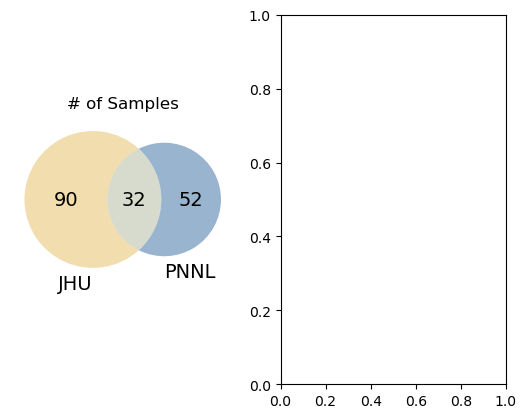

In [10]:
labels=['JHU', 'PNNL']
figure, axes = plt.subplots(1,2)
plot_venn(set(ov_proteomics_jhu.columns), set(ov_proteomics_pnnl.columns), axes[0], sample_title, labels)
plot_venn(set(ov_proteomics_jhu_processed.index), set(ov_proteomics_pnnl_processed.index), axes[1], proteins_title, labels)

In [11]:
# compute correlation for replicate proteomic profiles and eliminate gene symbols read as dates
correlation_ov_replicates = standardised_pipeline_utils.correlate_genewise( \
                                                                         ov_proteomics_pnnl_processed, 
                                                                         ov_proteomics_jhu_processed, 
                                                                           'Ovarian (JHU-PNNL)')

Median Spearman Correlation:  0.5742


### Colon Proteomic Replicates

#### MS technique : TMT

In [12]:
colon_proteomics_tmt = pd.read_csv(file_colon_proteomics_tmt, sep='\t', index_col='attrib_name')
print("Dimensions: ", colon_proteomics_tmt.shape)
colon_proteomics_tmt[:2]

Dimensions:  (6422, 96)


,01CO005,01CO006,01CO008,01CO013,01CO014,01CO015,01CO019,01CO022,05CO002,05CO003,...,20CO001,20CO003,20CO004,20CO006,20CO007,21CO006,21CO007,22CO004,22CO006,27CO004
attrib_name,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.672,-2.1500,-1.786,-2.115,-1.793,-2.526,-1.441,1.047,-1.878,-0.294,...,0.297,0.005,-3.390,-1.6480,-1.72,0.038,-1.952,-1.3342,-0.069,-2.6020
A1CF,-0.340,-0.3476,-0.124,-0.197,-0.730,NaN,-0.103,-1.126,0.507,-1.657,...,-0.097,-1.693,0.985,0.9395,NaN,-0.877,0.777,0.1120,-0.519,0.1017


#### MS technique : LF

In [13]:
colon_proteomics_lf = pd.read_csv(file_colon_proteomics_lf, sep='\t', index_col='attrib_name')
print("Dimensions: ", colon_proteomics_lf.shape)
colon_proteomics_lf[:2]

Dimensions:  (3388, 100)


,01CO006,01CO008,05CO004,05CO006,05CO007,05CO011,05CO015,05CO020,05CO028,05CO029,...,11CO061,11CO044,05CO045,11CO021,11CO047,11CO022,09CO014,09CO015,09CO018,09CO019
attrib_name,,,,,,,,,,,,,,,,,,,,,
PLEC,7.4886,8.4007,7.8071,7.4886,8.4007,8.1871,7.5941,7.9645,8.4007,8.1871,...,7.5941,7.9645,8.1871,8.1871,7.9645,7.9645,7.5941,8.1871,7.8071,8.0801
MYH9,7.8071,7.9645,8.1871,7.1891,7.1891,7.8071,7.4886,7.8071,7.5941,7.7023,...,7.4886,7.8071,7.5941,7.5941,7.8071,7.7023,7.4034,7.9645,7.9645,7.8071


In [14]:
# Run the data by the standardised pipeline to obtain processed values for protein measurements 
common_samples = standardised_pipeline_utils.get_common_samples(colon_proteomics_tmt, colon_proteomics_lf)
colon_proteomics_tmt_processed = colon_proteomics_tmt[common_samples]
colon_proteomics_lf_processed = colon_proteomics_lf[common_samples]

In [15]:
colon_proteomics_tmt_processed = standardised_pipeline_utils.process(colon_proteomics_tmt_processed)
colon_proteomics_lf_processed = standardised_pipeline_utils.process(colon_proteomics_lf_processed)

Dimensions:  (5152, 92)
Dimensions:  (3015, 92)


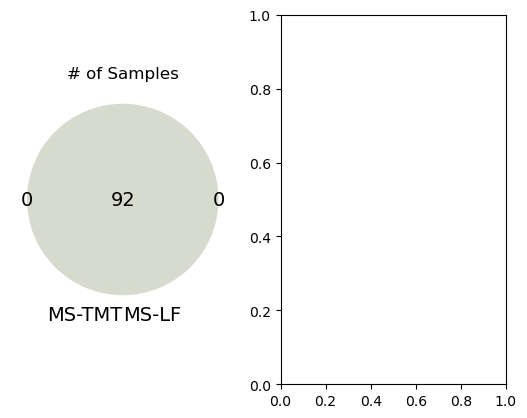

In [16]:
labels=['MS-TMT', 'MS-LF']
figure, axes = plt.subplots(1,2)
plot_venn(set(colon_proteomics_tmt_processed.columns), set(colon_proteomics_lf_processed.columns), 
          axes[0], sample_title, labels)
plot_venn(set(colon_proteomics_tmt_processed.index), set(colon_proteomics_lf_processed.index), 
          axes[1], proteins_title, labels)

In [17]:
correlation_colon_replicates = standardised_pipeline_utils.correlate_genewise(colon_proteomics_tmt_processed, 
                                                                               colon_proteomics_lf_processed, 
                                                                               'Colon (TMT-LF)')

Median Spearman Correlation:  0.2793


### CCLE Proteomic Replicates

In [18]:
ccle_replicates = pd.read_excel(io=file_ccle_proteomic_replicates, sheet_name="Replicates Expression", 
                                          index_col='Gene_Symbol')
print("Dimensions: ", ccle_replicates.shape)
ccle_replicates[:2]

Dimensions:  (10137, 65)


,Protein_Id,Description,Group_ID,Uniprot,Uniprot_Acc,TenPx01-R3_Peptides,TenPx02-R3_Peptides,TenPx02-R2_Peptides,TenPx01-R2_Peptides,TenPx02-R1_Peptides,...,JMSU1_URINARY_TRACT_TenPx02-R1,MDAMB468_BREAST_TenPx01-R1,SH4_SKIN_TenPx01-R1,AU565_BREAST_TenPx01-R1,KMRC1_KIDNEY_TenPx01-R1,CAL51_BREAST_TenPx01-R1,RPMI7951_SKIN_TenPx01-R1,RERFLCMS_LUNG_TenPx01-R1,IGR37_SKIN_TenPx01-R1,VMRCRCW_KIDNEY_TenPx01-R1
Gene_Symbol,,,,,,,,,,,,,,,,,,,,,
SLC12A2,sp|P55011|S12A2_HUMAN,S12A2_HUMAN Solute carrier family 12 member 2,0,S12A2_HUMAN,P55011,18,14,21,19,15,...,-0.286182,2.083943,0.048861,-0.467403,-0.845954,0.760211,-0.865324,0.704605,-0.678402,-1.129256
KDM1A,sp|O60341|KDM1A_HUMAN,KDM1A_HUMAN Lysine-specific histone demethylas...,1,KDM1A_HUMAN,O60341,28,38,38,23,35,...,0.176277,0.357073,-0.276871,0.170093,-0.576312,0.372726,-0.331901,0.378379,0.058477,-0.314633


In [19]:
ccle_replicates = ccle_replicates.loc[:, ccle_replicates.columns.str.contains('_TenPx')]
r1_measurements = ccle_replicates.loc[:, ccle_replicates.columns.str.contains('-R1')]
r2_measurements = ccle_replicates.loc[:, ccle_replicates.columns.str.contains('-R2')]
r3_measurements = ccle_replicates.loc[:, ccle_replicates.columns.str.contains('-R3')]

In [20]:
r1_measurements = r1_measurements.rename(columns = lambda x : str(x).split('-')[0])
r2_measurements = r2_measurements.rename(columns = lambda x : str(x).split('-')[0])
r3_measurements = r3_measurements.rename(columns = lambda x : str(x).split('-')[0])

In [21]:
r1_measurements_processed = standardised_pipeline_utils.process(r1_measurements)
r2_measurements_processed = standardised_pipeline_utils.process(r2_measurements)
r3_measurements_processed = standardised_pipeline_utils.process(r3_measurements)

Dimensions:  (7721, 18)
Dimensions:  (7686, 18)
Dimensions:  (7411, 18)


In [22]:
print('R1-R2: ')
correlation_ccle_r1_r2 = standardised_pipeline_utils.correlate_genewise(r1_measurements_processed, 
                                                                        r2_measurements_processed, 'CCLE (R1-R2)')
print('R1-R3: ')
correlation_ccle_r1_r3 = standardised_pipeline_utils.correlate_genewise(r1_measurements_processed, 
                                                                        r3_measurements_processed, 'CCLE (R1-R3)')
print('R2-R3: ')
correlation_ccle_r2_r3 = standardised_pipeline_utils.correlate_genewise(r2_measurements_processed, 
                                                                        r3_measurements_processed, 'CCLE (R2-R3)')

R1-R2: 
Median Spearman Correlation:  0.7049
R1-R3: 
Median Spearman Correlation:  0.7152
R2-R3: 
Median Spearman Correlation:  0.8885


<div class="alert alert-block alert-warning">
<b>Note:</b> The R1-R3 proteomic replicates' median correlation is the median correlation for all the combinations of replicates considered for CCLE proteomics data. Hence, all our further analyses are based on R1-R3 replicates' correlation only when considering CCLE proteomic replicates.</div>

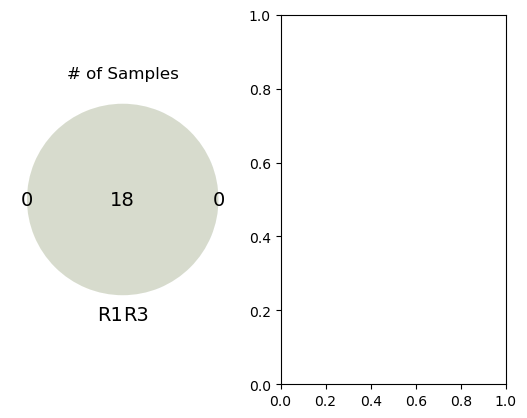

In [23]:
labels=['R1', 'R3']
figure, axes = plt.subplots(1,2)
plot_venn(set(r1_measurements_processed.columns), set(r3_measurements_processed.columns), 
          axes[0], sample_title, labels)
plot_venn(set(r1_measurements_processed.index), set(r3_measurements_processed.index), 
          axes[1], proteins_title, labels)

In [24]:
correlation_combined = pd.concat([correlation_ov_replicates, correlation_colon_replicates, correlation_ccle_r1_r3], axis=1)
correlation_combined.to_csv(file_proteomic_replicates)
correlation_combined[:2]

,Ovarian (JHU-PNNL),Colon (TMT-LF),CCLE (R1-R3)
A1BG,0.739736,0.256359,NaN
A2M,0.811584,0.227659,0.541796


### Identify proteins with high and low proteomic reproducibility across studies

In [25]:
proteomic_replicate_correlations = correlation_combined.dropna()
proteomic_replicate_correlations[:2]

,Ovarian (JHU-PNNL),Colon (TMT-LF),CCLE (R1-R3)
A2M,0.811584,0.227659,0.541796
AAAS,0.626948,0.150363,0.704850


In [26]:
proteomic_replicate_correlations[(proteomic_replicate_correlations['Ovarian (JHU-PNNL)'] > 0.7) & 
                                 (proteomic_replicate_correlations['Colon (TMT-LF)'] > 0.7) &
                                 (proteomic_replicate_correlations['CCLE (R1-R3)'] > 0.7)]

,Ovarian (JHU-PNNL),Colon (TMT-LF),CCLE (R1-R3)
ASS1,0.889663,0.751921,0.876161
GBP1,0.876833,0.727972,0.896801
ITGB4,0.843109,0.754737,0.946336
MCM3,0.807883,0.719578,0.708978
PRDX5,0.813783,0.712072,0.849329
WARS,0.859866,0.719839,0.857585


In [27]:
proteomic_replicate_correlations[(proteomic_replicate_correlations['Ovarian (JHU-PNNL)'] < 0.2) & 
                                 (proteomic_replicate_correlations['Colon (TMT-LF)'] < 0.2) &
                                 (proteomic_replicate_correlations['CCLE (R1-R3)'] < 0.2)]

,Ovarian (JHU-PNNL),Colon (TMT-LF),CCLE (R1-R3)
RPL24,0.095317,0.076987,0.143447
RPL35,-0.178886,-0.042658,0.093911
RPL36AL,0.119146,0.089873,-0.073271
RPS15A,0.160389,-0.017154,0.077399
RPS29,0.072214,-0.073834,0.180599
RPS9,0.187168,0.101687,-0.114551


<div class="alert alert-block alert-warning">
<b>Note:</b> Choosing proteins GBP1 and RPS29 to indicate the variation in proteomic reproducibility.</div>

In [28]:
ov_replicates_combined = pd.concat([ov_proteomics_pnnl_processed.loc[['GBP1', 'RPS29']], 
                                    ov_proteomics_jhu_processed.loc[['GBP1', 'RPS29']]], 
                                   axis=0, keys=['PNNL', 'JHU'])

ccle_replicates_combined = pd.concat([r1_measurements_processed.loc[['GBP1', 'RPS29']], 
                                      r3_measurements_processed.loc[['GBP1', 'RPS29']]], 
                                     axis=0, keys=['R1', 'R3']) 

colon_replicates_combined = pd.concat([colon_proteomics_tmt_processed.loc[['GBP1', 'RPS29']],
                                       colon_proteomics_lf_processed.loc[['GBP1', 'RPS29']]], 
                                      axis=0, keys=['TMT', 'LF'])                     

In [29]:
writer = pd.ExcelWriter(file_selected_proteomic_replicates)
ov_replicates_combined.to_excel(writer,'Ovarian replicates')
ccle_replicates_combined.to_excel(writer, 'CCLE replicates')
colon_replicates_combined.to_excel(writer, 'Colon replicates')
writer.save()